In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

import requests
from urllib.parse import urlencode
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', None)

<hr>

# Linear models


### Linear regression notes

__The linear regression method relies on The least squares method. The basic idea of The least squares is in RSS (residual sum of squares) minimization.__


* __RSS__ 
<div>
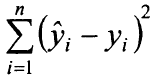
</div>


__In order to the least squares method RSS must be minimized__

<div>
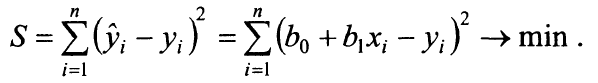
</div>

__To find minimum of the function we should perform calculation of the extremum-points (equate the derivative to 0).__

<div>
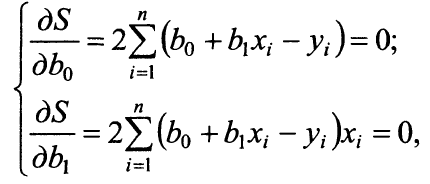
</div>
<div>
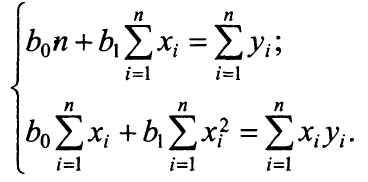
</div>
<div>
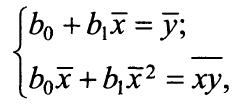
</div>
<div>
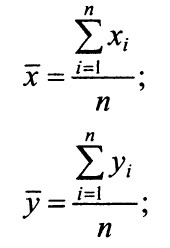
</div>
<div>
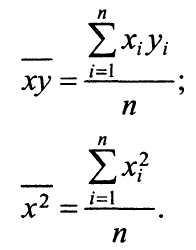
</div>

This set of points was generated manually, but let's assume that we got it as a result of some experiment, and now we need to describe this data set with a formula. How could we do that?

There exists one method to perform these calculations named the least squares method. The basic idea of this method is in calculation of some function whose plot runs as close as possible to all points of the cloud. In simple terms, we need to plot a line or a curve where each point is happy to the best of its ability. The selected function should be as simple as possible, but there are also a lot of such functions: linear, hyperbolic, exponential, logarithmic etc. And, of course, I would like to "reduce the field of activity" right away. Which class of functions should I choose for the study? A primitive but effective technique: to draw the points and analyze the cloud shape.

In this case, the line could be described by the linear function expression.



So, to describe this dataset we need to calculate two parameters of this function (a, b). But it can be any numbers, which ones should we choose?

LSM answers this question. You should use the following parameters (a, b) when __the residual sum of squares__ is minimized. What does it mean? In considered case we have a set of points extracted from some distribution (y(x)) and we need to plot the line to describe this set (f(x)). The main requriment of the best trend line: the distance between plot-line and each point should be minimum. We need to select such parameters a and b that if we perform calculation of distances between plot-line and each point for all points in distribution the sum of these distanes will be minimum. But if we occurred it directly, without any transformation, the sum will be 0, so to level out this effect we could summarize the squares of distances. 

__r - correlation coeff__

__b - regression coeff__ 

__s(sigma) - sample standard deviation__

__Cov - sample covariation__
<div>
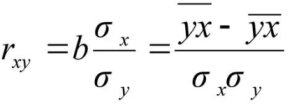
</div>
<div>
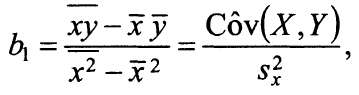
</div>
<div>
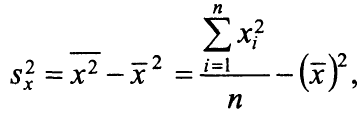
</div>
<div>
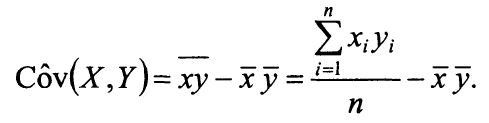
</div>
<div>
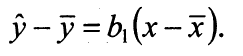
</div>

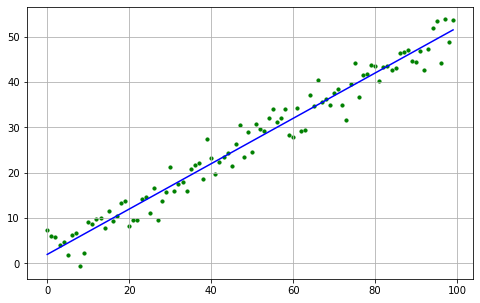

In [24]:
N = 100     # number of points
sigma = 3   # standard diviation of the distribution
k = 0.5     # k-value
b = 2       # b-value

x = np.array(range(N))
f = np.array([k*z+b for z in range(N)])
y = f + np.random.normal(0, sigma, N)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=10, c='g') # scatterplot of the dataset
plt.plot(x, f, c='b')           # the original line describing data
plt.grid(True)
plt.show()

In [ ]:
# X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
# theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

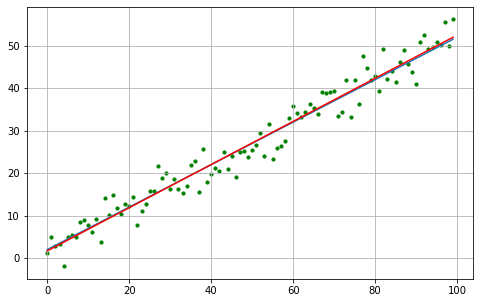

In [15]:
# calculate coeff
x_mean = x.sum()/N
y_mean = y.sum()/N
x_sq_mean = np.dot(x.T, x)/N
xy_mean = np.dot(x.T, y)/N

cov = xy_mean - (x_mean * y_mean)
s_sq = x_sq_mean - x_mean**2

b1 = cov / s_sq

ff = np.array([(b1 * x - b1 * x_mean + y_mean) for x in range(N)])


plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=10, c='g')
plt.grid(True)
plt.plot(f)
plt.plot(ff, c='red')
plt.show()

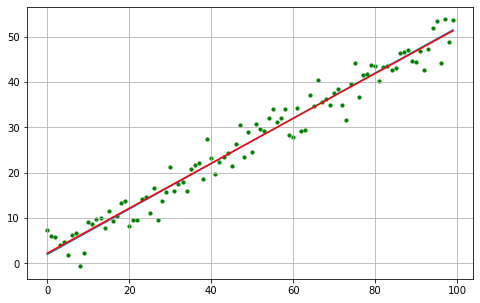

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(x.reshape(100, 1), y)
# lin_reg.intercept_, lin_reg.coef_[0]

ff = np.array([(lin_reg.coef_[0] * x + lin_reg.intercept_) for x in range(N)])


plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=10, c='g')
plt.grid(True)
plt.plot(f)
plt.plot(ff, c='red')
plt.show()

In [6]:
# -----------------------------------------------------------------------------------------------------

In [7]:
def get_zip_yandex_disk(public_key):    
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    url = base_url + urlencode(dict(public_key=public_key)) 
    response = requests.get(url)
    download_link = response.json()['href']
    download_response = urlopen(download_link)
    zip_file = ZipFile(BytesIO(download_response.read()))
    file_names = list([x.filename for x in zip_file.infolist()])
    print(f'zip file contains {file_names}')
    return zip_file

def get_info(df):
    edited_df = df.applymap(lambda x: np.nan if 'nan' in str(x).lower() else x)
    info_df = pd.DataFrame()
    info_df['col_name'] = edited_df.columns.to_list()
    info_df['dtype'] = edited_df.dtypes.to_list()
    info_df['missing_values'] = edited_df.isna().sum().to_list()
    info_df['unique_vals'] = edited_df.nunique().to_list()
    info_df['total_vals'] = edited_df.shape[0]
    return info_df

In [8]:
cars_zip = get_zip_yandex_disk('https://yadi.sk/d/wFQs7kAohTeqkg')

zip file contains ['CarPrice_Assignment.csv', 'Data Dictionary - carprices.xlsx']


In [9]:
cars_price = pd.read_csv(cars_zip.open('CarPrice_Assignment.csv'))

In [10]:
cars_price.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [11]:
get_info(cars_price)

,col_name,dtype,missing_values,unique_vals,total_vals
0,car_ID,int64,0,205,205
1,symboling,int64,0,6,205
2,CarName,object,0,147,205
3,fueltype,object,0,2,205
4,aspiration,object,0,2,205
5,doornumber,object,0,2,205
6,carbody,object,0,5,205
7,drivewheel,object,0,3,205
8,enginelocation,object,0,2,205
9,wheelbase,float64,0,53,205
